In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
cardio_df = pd.read_csv("cardio_train.csv",sep=';')

In [5]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Perform Exploratory Data Analysis

In [6]:
# Age looks weired
# gender looks weired

# we dont need id so lets drop id
cardio_df = cardio_df.drop(columns = 'id')

In [7]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [8]:
# lets convert age from days into years
cardio_df['age'] = cardio_df['age']/365

In [9]:
cardio_df['age'].head()

0    50.391781
1    55.419178
2    51.663014
3    48.282192
4    47.873973
Name: age, dtype: float64

In [10]:
# lets see if there are any null values
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
# No null values in the data frame

In [12]:
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [14]:
# details of the individuals older than 64 years
cardio_df[cardio_df['age']>64.8]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
395,64.824658,2,160,78.0,140,90,1,1,0,0,1,0
643,64.802740,1,154,79.0,130,80,1,1,0,0,1,0
2936,64.808219,2,156,60.0,140,90,1,1,0,0,1,1
4295,64.849315,1,169,75.0,120,80,1,1,0,0,1,0
9787,64.838356,2,165,70.0,120,80,1,1,0,0,0,0
10422,64.816438,2,177,102.0,130,80,1,2,0,0,1,0
16439,64.821918,1,160,65.0,130,80,3,3,0,0,0,1
18062,64.863014,1,140,48.0,170,100,2,1,0,0,1,1
20931,64.904110,1,165,63.0,150,90,2,1,0,0,1,1
22229,64.838356,2,170,91.0,130,90,1,1,0,0,1,0


# Visualize Data set

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>],
       [<Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>]], dtype=object)

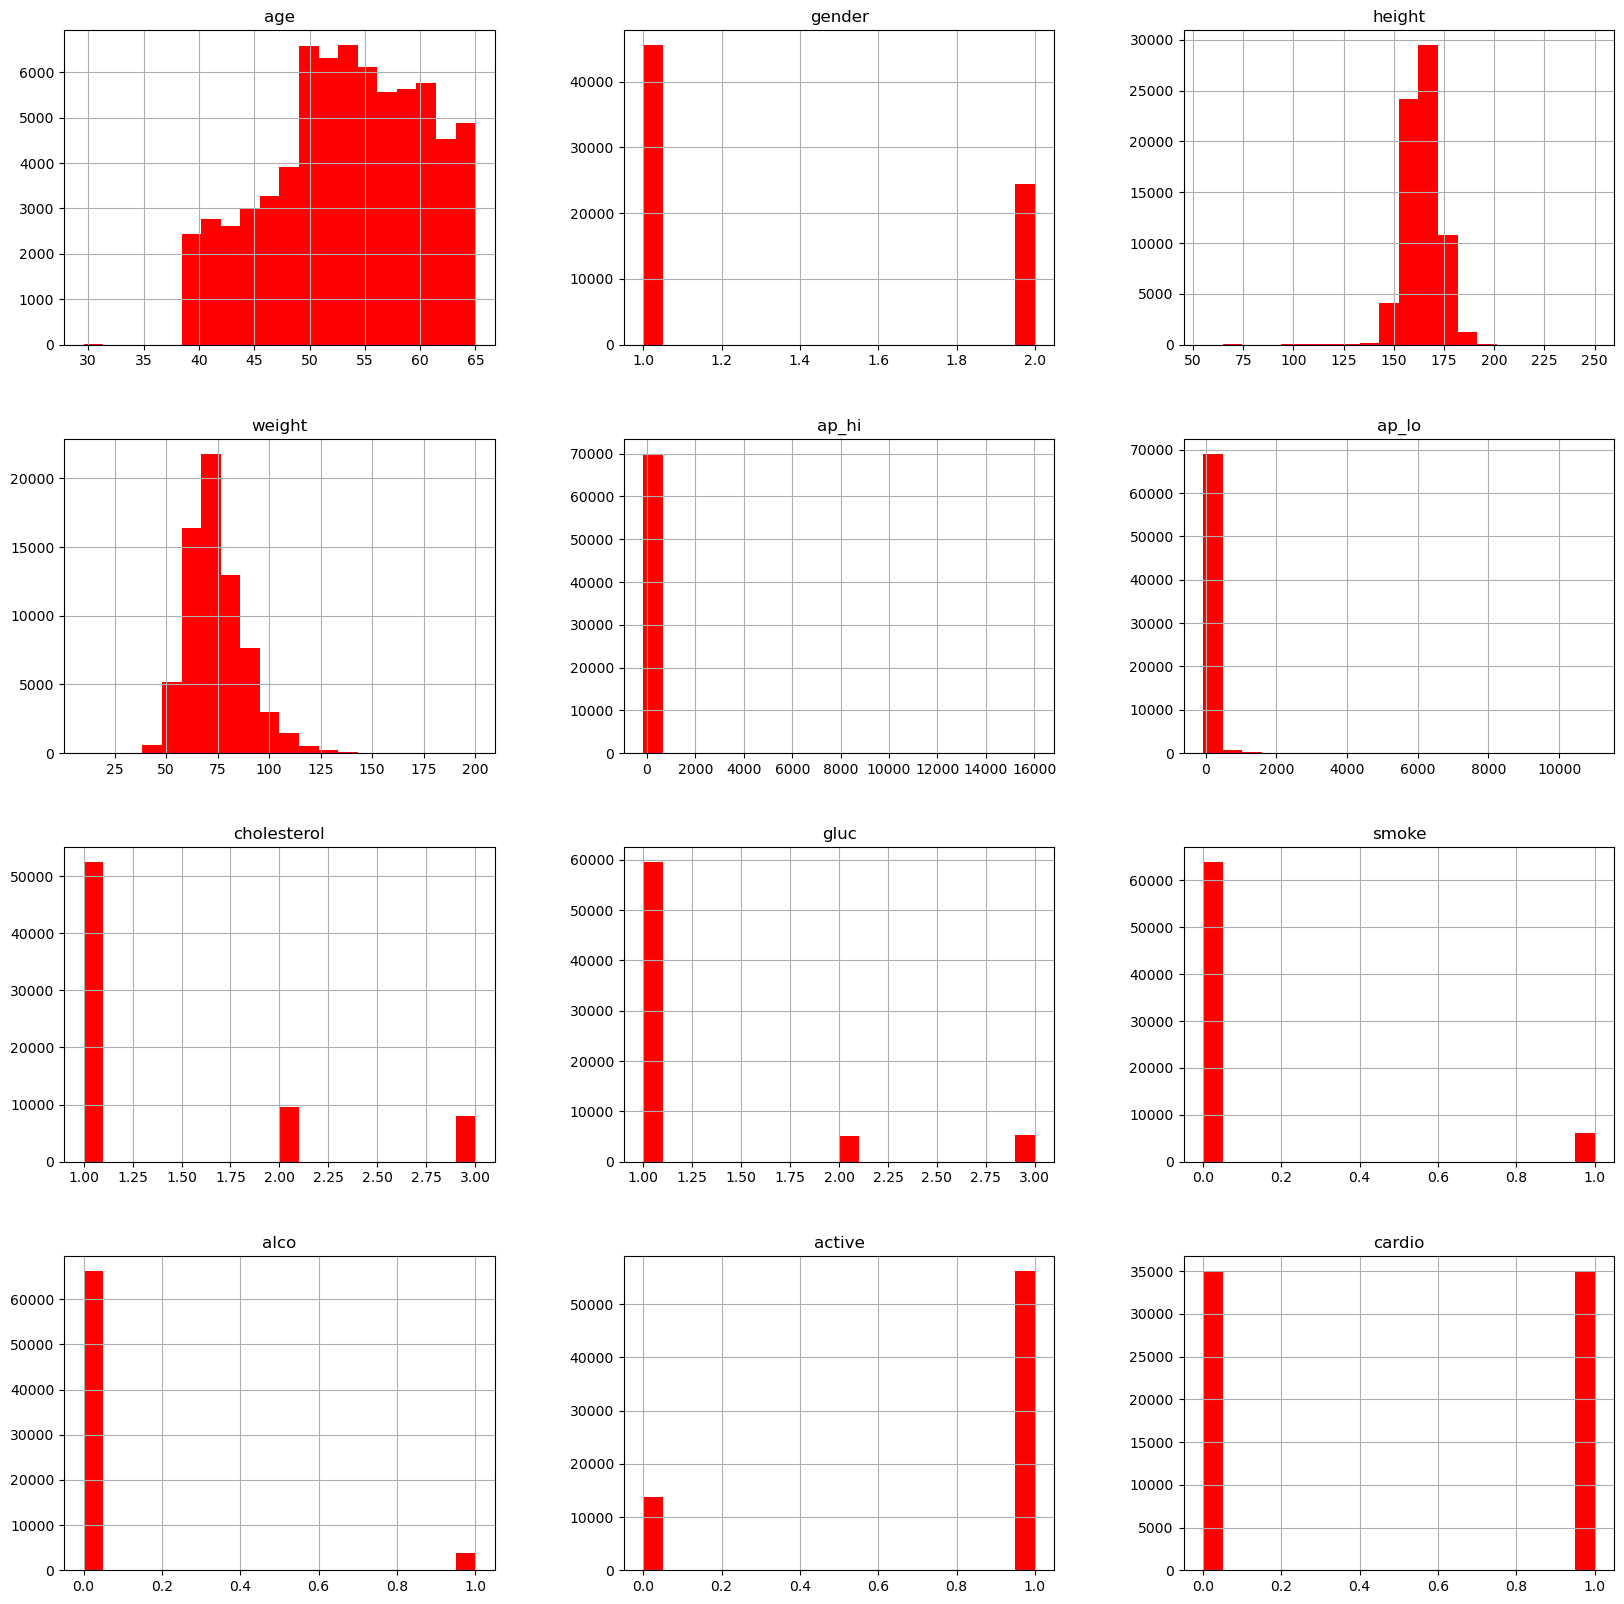

In [15]:
cardio_df.hist(bins = 20, figsize=(20,20),color = 'r')

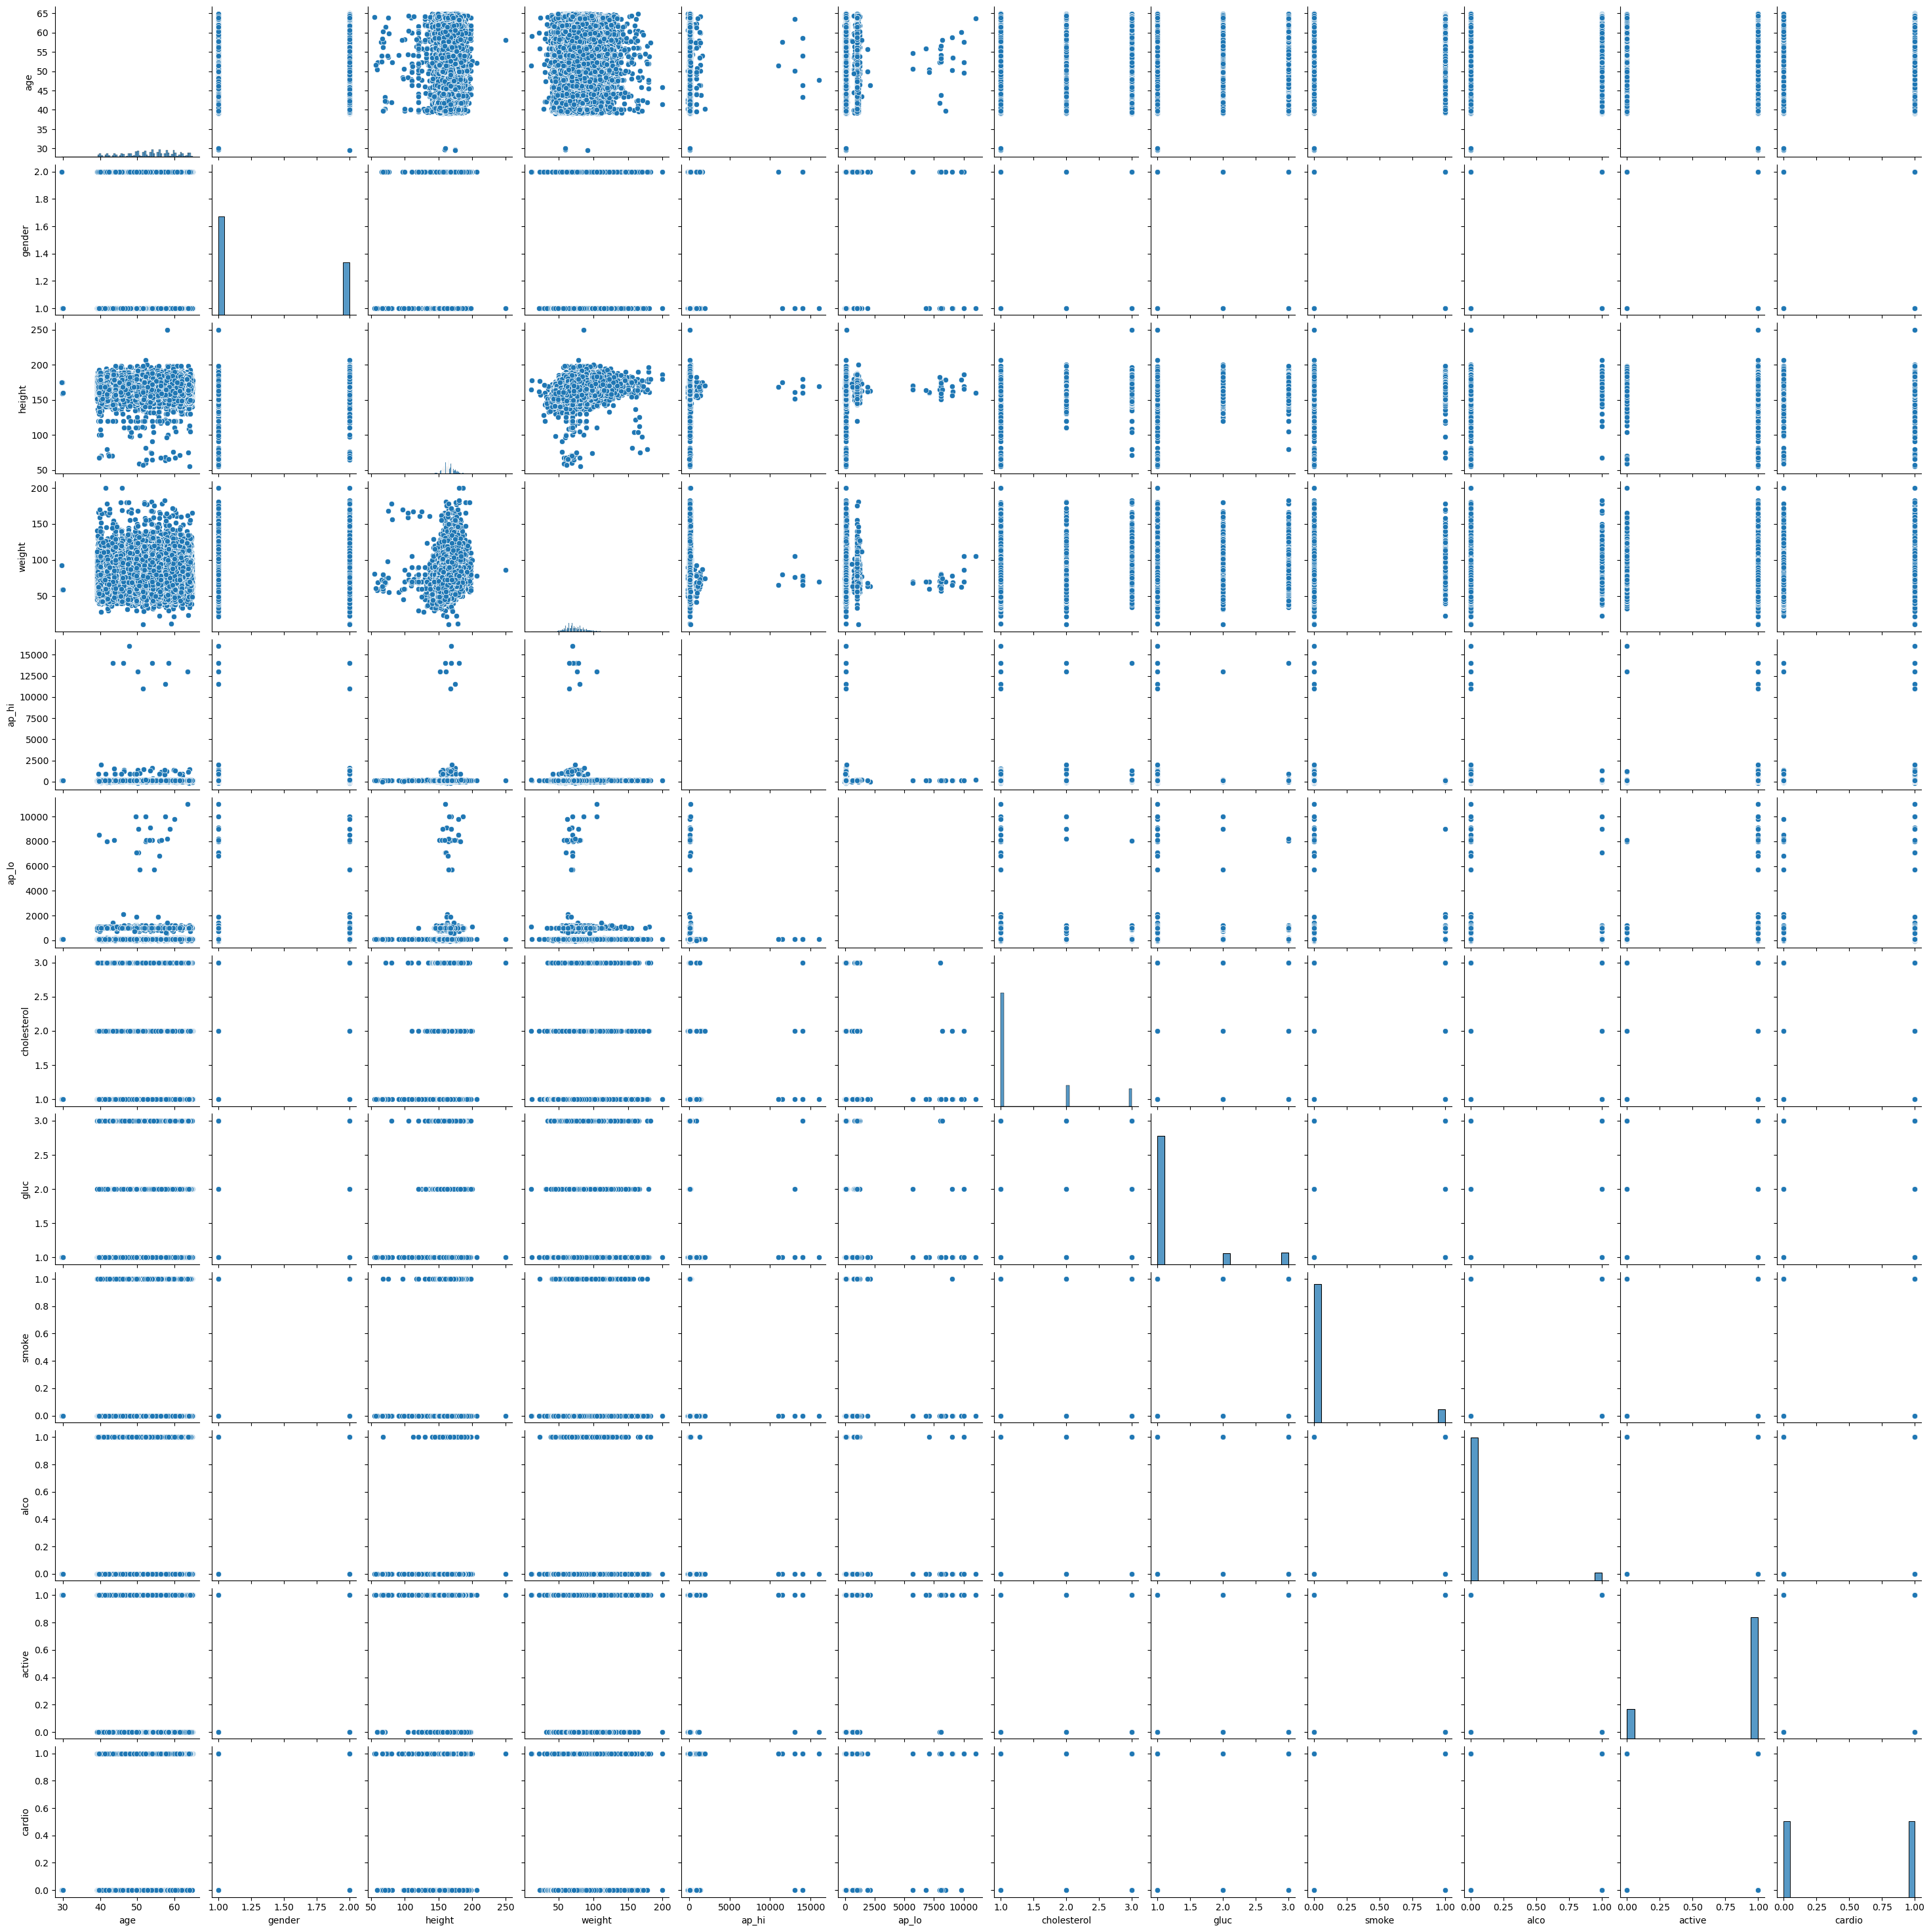

In [16]:
sns.pairplot(cardio_df)

<Axes: >

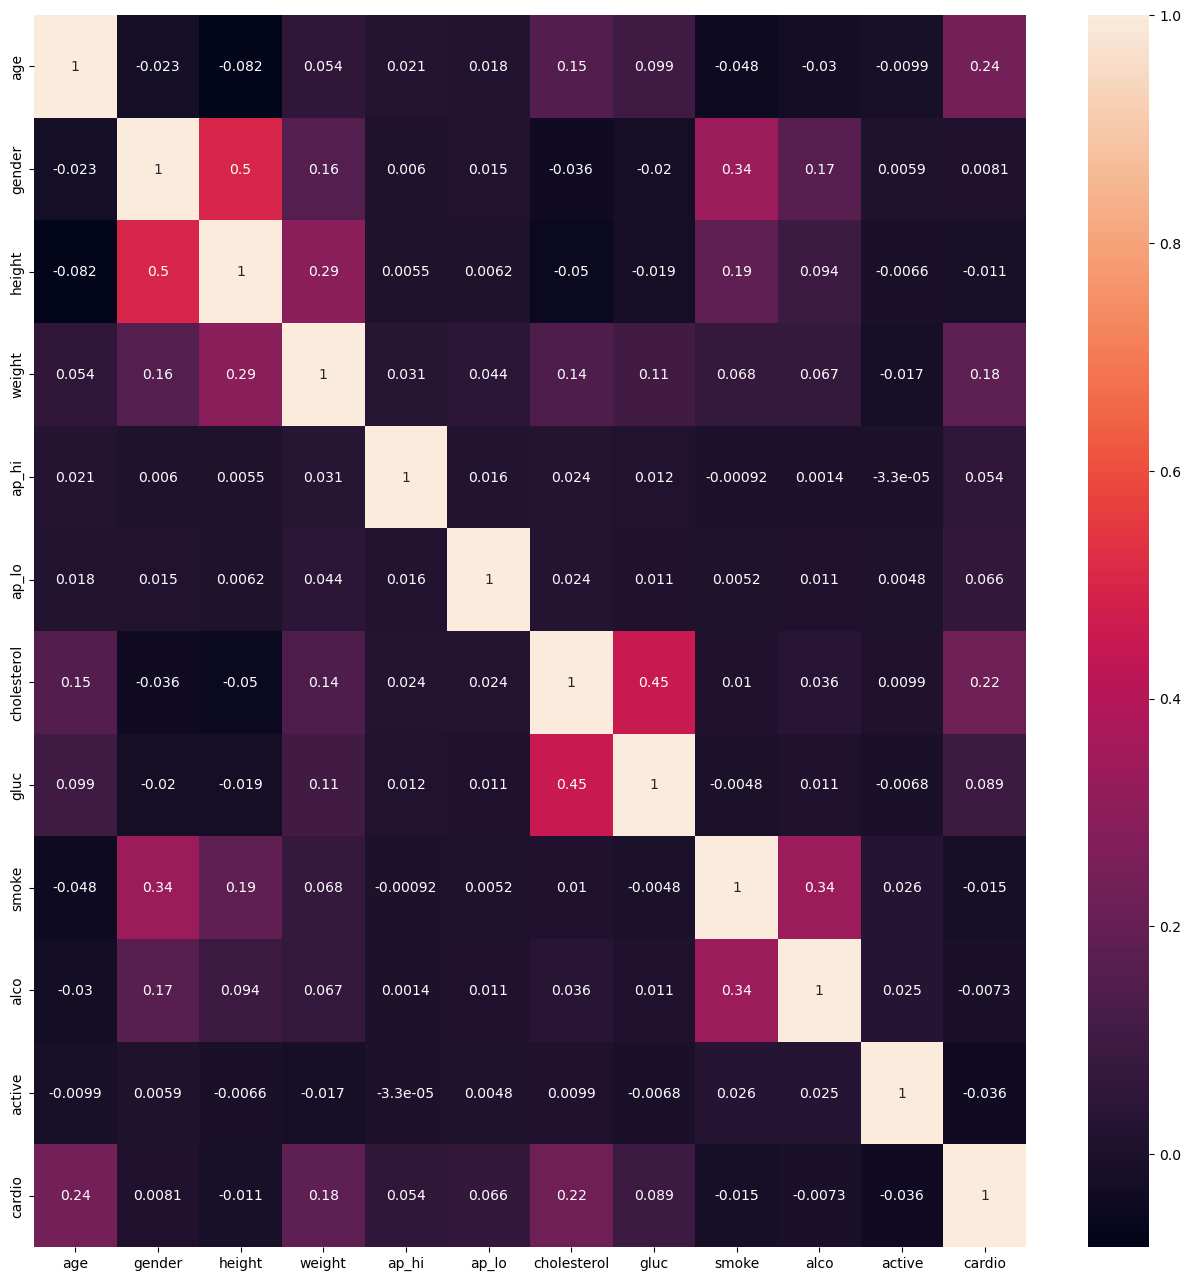

In [17]:
corr_matrix = cardio_df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix, annot = True)

In [18]:
# there are few +ve correlerations

In [19]:
# create train and test data set
df_target = cardio_df['cardio']
df_final = cardio_df.drop(columns = 'cardio')

In [20]:
df_target.shape

(70000,)

In [21]:
df_final.shape

(70000, 11)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final,df_target, test_size = 0.2)

In [23]:
X_train.shape

(56000, 11)

In [24]:
X_test.shape

(14000, 11)

# Train and test xgboost in local mode

In [25]:
!pip install xgboost

In [26]:
# we havent used any PCA yet. We just simply build simple classifier

In [27]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [28]:
predict = model.predict(X_test)

In [29]:
predict

array([0, 0, 1, ..., 0, 0, 1])

<Axes: >

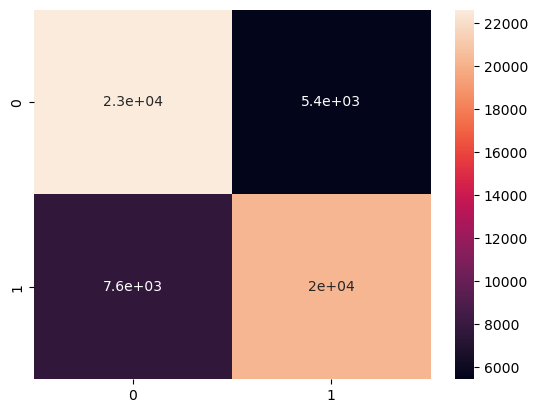

In [30]:
# asses performance on the trained data set as well
predict_train = model.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,predict_train)
plt.figure()
sns.heatmap(cm, annot = True)

In [31]:
# if we see above confusion matrix we see false +ves and false -ves are high


In [32]:
# lets calculate precision score and f1 and recall, accuracy

from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

print("Precision = {}".format(precision_score(y_train,predict_train)))
print("Recall = {}".format(recall_score(y_train,predict_train)))
print("f1 score = {}".format(f1_score(y_train,predict_train)))
print("accuracy = {}".format(accuracy_score(y_train,predict_train)))

Precision = 0.7889066085806526
Recall = 0.726120578547902
f1 score = 0.7562125985719879
accuracy = 0.7664821428571429


In [33]:
# Not that great but better than the random classifier

<Axes: >

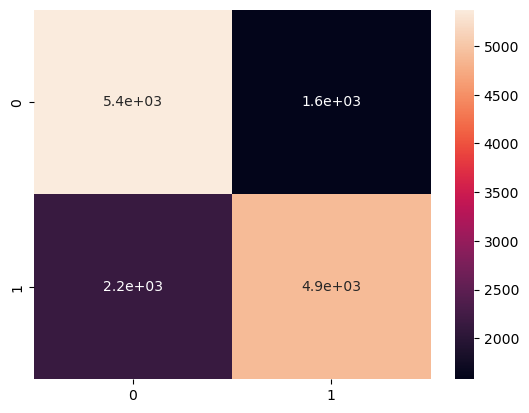

In [34]:
# now lets see the metrics for test data
from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_test,predict)
plt.figure()
sns.heatmap(cm_test,annot = True)

In [35]:
# here the results are better
# lets see the other metrics
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision : {}".format(precision_score(y_test,predict)))
print("Recall : {}".format(recall_score(y_test,predict)))
print("Accuracy :{}".format(accuracy_score(y_test,predict)))
print("F1 score :{}".format(f1_score(y_test,predict)))

Precision : 0.755988255292845
Recall : 0.6941961118206329
Accuracy :0.7332857142857143
F1 score :0.7237757064654534


In [36]:
# lets try to re train the model with some hyperparameter changes
xgb_model = XGBClassifier(learning_rate = 0.01, n_estimators = 500 , max_depth = 20)
xgb_model.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [37]:
predict = xgb_model.predict(X_test)

<Axes: >

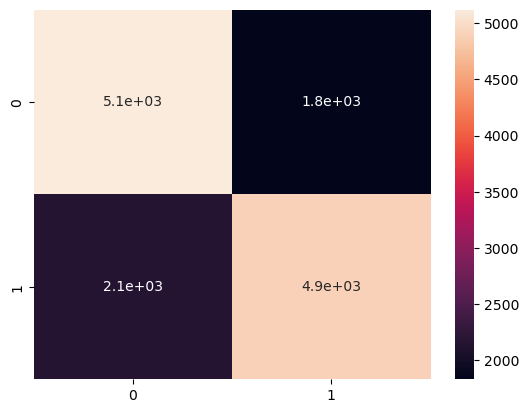

In [38]:
# lets see if there is any improvement
new_model_cm = confusion_matrix(y_test,predict)
sns.heatmap(new_model_cm,annot = True)

In [39]:
# dont see much improvement
print("Precision : {}".format(precision_score(y_test,predict)))
print("Recall : {}".format(recall_score(y_test,predict)))
print("Accuracy :{}".format(accuracy_score(y_test,predict)))
print("F1 score :{}".format(f1_score(y_test,predict)))

Precision : 0.727947727947728
Recall : 0.6956151553852703
Accuracy :0.7159285714285715
F1 score :0.7114142660184312


In [40]:
# it actually dropped

In [41]:
# try to attempt to tune xgboost classifier using grid search

In [42]:
param_grid = {
                'gamma' : [0.5,1,5], # regularization Parameter
                'subsample':[0.6,0.8,1.0], #% of rows taken to build each tree
                'colsample_bytree' : [0.6,0.8,1.0], #num of columns used by eah tree
                'max_depth' : [3,4,5] # depth of each tree
}

In [43]:
# lets create a grid
from sklearn.model_selection import GridSearchCV

# lets create a new xgb model
xgb_model_2 = XGBClassifier(learning_rate = 0.01,n_estimators = 100, objective = "binary:logistic")
grid = GridSearchCV(xgb_model_2, param_grid,verbose = 4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.729 total time=   0.4s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.734 total time=   0.4s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.722 total time=   0.3s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.731 total time=   0.4s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.729 total time=   0.4s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.729 total time=   0.4s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.732 total time=   0.3s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.722 total time=   0.3s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.731 tot

,estimator,"XGBClassifier...ate=None, ...)"
,param_grid,"{'colsample_bytree': [0.6, 0.8, ...], 'gamma': [0.5, 1, ...], 'max_depth': [3, 4, ...], 'subsample': [0.6, 0.8, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,4
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [44]:
predict_optim = grid.predict(X_test)

In [45]:
# lets calculate the metrics
print("Precision : {}".format(precision_score(y_test,predict_optim)))
print("Recall : {}".format(recall_score(y_test,predict_optim)))
print("Accuracy :{}".format(accuracy_score(y_test,predict_optim)))
print("F1 score :{}".format(f1_score(y_test,predict_optim)))

Precision : 0.7705987926252243
Recall : 0.6702142755782603
Accuracy :0.7335714285714285
F1 score :0.716909532483303


In [46]:
# there is a minor improvement

# Perform Dimensionality Reduction using PCA

In [47]:
import sagemaker
import boto3

sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

bucket = 'sagemaker-xgboost-practical'
prefix = 'pca'

print("Sagemaker Execution Role is : {}".format(role))


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
Sagemaker Execution Role is : arn:aws:iam::846247541837:role/service-role/AmazonSageMaker-ExecutionRole-20251016T121502


In [48]:
# lets write the input into s3
import io
import os
import sagemaker.amazon.common as smac

buf = io.BytesIO()

df_matrix = df_final.to_numpy()

smac.write_numpy_to_dense_tensor(buf,df_matrix)
buf.seek(0)

key = 'pca'

boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix,'train',key)).upload_fileobj(buf)

s3_train_data = "s3://{}/{}/train/{}".format(bucket,prefix,key)

print("Uploaded training data at location :{}".format(s3_train_data))

Uploaded training data at location :s3://sagemaker-xgboost-practical/pca/train/pca


In [49]:
output_location = "s3://{}/{}/output".format(bucket,prefix)
print("Model Artifacts will be loaded at : {}".format(output_location))

Model Artifacts will be loaded at : s3://sagemaker-xgboost-practical/pca/output


In [50]:
from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name , 'pca')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [51]:
# now pass the container and type of instances to train the model
pca = sagemaker.estimator.Estimator(container,
                                    role,
                                    train_instance_type = 'ml.c4.xlarge',
                                    train_instance_count = 1,
                                    output_path = output_location,
                                    sagemaker_session = sagemaker_session,
                                    )

# set hyperparameters
pca.set_hyperparameters(feature_dim = 11, # num of original parameters we are feeding in
                        num_components = 6, # reduce the number of parameters to 6
                        subtract_mean = False,
                        algorithm_mode = 'regular',
                        mini_batch_size = 100)

pca.fit({'train' : s3_train_data})

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: pca-2025-10-16-22-42-20-617


2025-10-16 22:42:23 Starting - Starting the training job...
2025-10-16 22:42:37 Starting - Preparing the instances for training...
2025-10-16 22:43:23 Downloading - Downloading the training image............
2025-10-16 22:45:25 Training - Training image download completed. Training in progress.
2025-10-16 22:45:25 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
[10/16/2025 22:45:19 INFO 140437718583104] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-conf.json: {'algorithm_mode': 'regular', 'subtract_mean': 'true', 'extra_components': '-1', 'force_dense': 'true', 'epochs': 1, '_log_level': 'info', '_kvstore': 'dist_sync', '_num_kv_servers': 'auto', '_num_gpus': 'auto'}
[10/16/20

# Deploy the trained model 

In [52]:
pca_reduction = pca.deploy(initial_instance_count = 1,instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: pca-2025-10-16-22-46-08-417
INFO:sagemaker:Creating endpoint-config with name pca-2025-10-16-22-46-08-417
INFO:sagemaker:Creating endpoint with name pca-2025-10-16-22-46-08-417


--------!

In [53]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

pca_reduction.content_type = 'text/csv'

pca_reduction.serializer = CSVSerializer(content_type = "text/csv") # added content type and accept to avoid error : TypeError: can only join an iterable
pca_reduction.deserializer = JSONDeserializer(accept='application/json')

In [54]:
result = pca_reduction.predict(df_matrix)

In [55]:
result

{'projections': [{'projection': [-0.2891036570072174,
    3.9943747520446777,
    -12.549570083618164,
    64.24058532714844,
    36.82109451293945,
    -217.8480682373047]},
  {'projection': [1.0957019329071045,
    -4.777677059173584,
    12.364439010620117,
    44.58211135864258,
    45.66633987426758,
    -241.0251007080078]},
  {'projection': [1.336683988571167,
    1.7997606992721558,
    -9.735824584960938,
    53.424842834472656,
    55.75396728515625,
    -223.01675415039062]},
  {'projection': [-0.4163884222507477,
    6.149697303771973,
    5.682126998901367,
    43.042396545410156,
    45.00962448120117,
    -257.2431640625]},
  {'projection': [-0.14980435371398926,
    2.6750032901763916,
    -13.209842681884766,
    63.61091995239258,
    44.3466911315918,
    -192.79931640625]},
  {'projection': [0.8930057883262634,
    -10.548048973083496,
    -2.894824981689453,
    50.40694808959961,
    40.3013801574707,
    -217.75537109375]},
  {'projection': [0.9225766658782959,
 

In [56]:
predictions = np.array([r['projection'] for r in result['projections']])

In [57]:
predictions # reduced number of principle components . Now we can use these reduced components to feed in to XGBOOST algorithm

array([[-2.89103657e-01,  3.99437475e+00, -1.25495701e+01,
         6.42405853e+01,  3.68210945e+01, -2.17848068e+02],
       [ 1.09570193e+00, -4.77767706e+00,  1.23644390e+01,
         4.45821114e+01,  4.56663399e+01, -2.41025101e+02],
       [ 1.33668399e+00,  1.79976070e+00, -9.73582458e+00,
         5.34248428e+01,  5.57539673e+01, -2.23016754e+02],
       ...,
       [ 9.36102509e-01,  6.50153160e+00,  2.10844498e+01,
         4.50918350e+01,  7.45691071e+01, -2.82263916e+02],
       [ 1.15454197e-03, -8.17430115e+00, -2.97180176e+00,
         5.16770020e+01,  5.14335823e+01, -2.34024872e+02],
       [ 3.68915290e-01, -1.09633231e+00, -4.88934517e+00,
         6.41318741e+01,  4.39791260e+01, -2.28002136e+02]])

In [58]:
pca_reduction.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pca-2025-10-16-22-46-08-417
INFO:sagemaker:Deleting endpoint with name: pca-2025-10-16-22-46-08-417


In [59]:
predictions.shape

(70000, 6)

# Train and evaluate XGBoost after Dimensionality Reduction using PCA

In [60]:
# predictions here are the reduced number of components that we can feed to XGBoost to get better performance.
# XGBoost expects target column as the first column in the dataframe
train_data = pd.DataFrame({'Target':df_target})
train_data

,Target
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [61]:
# Now we attach predictions to the train_data that makes the input to the XGBoost model
for i in range(predictions.shape[1]):
    train_data[i] = predictions[:,i]

In [62]:
train_data.head()

,Target,0,1,2,3,4,5
0,0,-0.289104,3.994375,-12.549570,64.240585,36.821095,-217.848068
1,1,1.095702,-4.777677,12.364439,44.582111,45.666340,-241.025101
2,1,1.336684,1.799761,-9.735825,53.424843,55.753967,-223.016754
3,1,-0.416388,6.149697,5.682127,43.042397,45.009624,-257.243164
4,0,-0.149804,2.675003,-13.209843,63.610920,44.346691,-192.799316


In [63]:
# lets divide the data into train and testing
train_data_size = int(0.9*train_data.shape[0])
train_data_size

63000

In [64]:
# lets shuffle the data
import sklearn
train_data = sklearn.utils.shuffle(train_data)
train, test,valid = train_data[:train_data_size],train_data[train_data_size:train_data_size+3500],train_data[train_data_size+3500:]

In [65]:
train.shape , test.shape, valid.shape

((63000, 7), (3500, 7), (3500, 7))

In [66]:
X_test, y_test = test.drop(columns = ["Target"]), test['Target']

In [67]:
# save train and validation sata as csv
train.to_csv('train.csv',header = False,index = False)
valid.to_csv('valid.csv',header = False,index = False)

In [68]:
prefix = 'XGBoost-Classifier'
key = 'XGBoost-Classifier'

In [69]:
with open('train.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix,'train',key)).upload_fileobj(f)

s3_train_data = "s3://{}/{}/train/{}".format(bucket,prefix,key)
print("Uploaded training data at :{}".format(s3_train_data))

Uploaded training data at :s3://sagemaker-xgboost-practical/XGBoost-Classifier/train/XGBoost-Classifier


In [70]:
with open('valid.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix,'valid',key)).upload_fileobj(f)

s3_valid_data = "s3://{}/{}/valid/{}".format(bucket,prefix,key)
print("Uploaded validation data at :{}".format(s3_valid_data))

Uploaded validation data at :s3://sagemaker-xgboost-practical/XGBoost-Classifier/valid/XGBoost-Classifier


In [71]:
output_location = "s3://{}/{}/output".format(bucket,prefix)
print("classifier artifacts wil be uploaded to : {}",output_location)

classifier artifacts wil be uploaded to : {} s3://sagemaker-xgboost-practical/XGBoost-Classifier/output


In [72]:
# get xgboost image
container = get_image_uri(boto3.Session().region_name,'xgboost','1.7-1')

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [73]:
xgboost_classifier = sagemaker.estimator.Estimator(container,
                                                   role,
                                                   train_instance_count = 1,
                                                   train_instance_type = 'ml.m4.xlarge',
                                                   output_path = output_location,
                                                   sagemaker_session = sagemaker_session)

# set hyperparameters
xgboost_classifier.set_hyperparameters(max_depth = 3,
                                       objective = 'multi:softmax',
                                       num_class = 2,
                                       eta = 0.5,
                                       num_round = 150)

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [74]:
train_input = sagemaker.session.s3_input(s3_data = s3_train_data,content_type = 'csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_valid_data, content_type = 'csv', s3_data_type = 'S3Prefix')

xgboost_classifier.fit({'train':train_input, 'validation': valid_input})

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.telemetry.telemetry_logging:SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defaults config. For more information, refer to https://sagemaker.readthedocs.io/en/stable/overview.html#configuring-and-using-defaults-with-the-sagemaker-python-sdk.
INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2025-10-16-22-50-44-423


2025-10-16 22:50:46 Starting - Starting the training job...
2025-10-16 22:51:01 Starting - Preparing the instances for training...
2025-10-16 22:51:28 Downloading - Downloading input data...
2025-10-16 22:51:58 Downloading - Downloading the training image......
2025-10-16 22:53:04 Training - Training image download completed. Training in progress.../miniconda3/lib/python3.9/site-packages/sagemaker_containers/_server.py:22: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
[2025-10-16 22:53:24.071 ip-10-0-64-39.ec2.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2025-10-16 22:53:24.138 ip-10-0-64-39.ec2.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2025-10-16:22:53:24:INFO] Imported framework sagemaker_xgboost_container.training

# deploy and Test the trained XGBoost classifier Model

In [75]:
xgboost_classifier = xgboost_classifier.deploy(initial_instance_count = 1,
                                               instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2025-10-16-22-54-32-630
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2025-10-16-22-54-32-630
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2025-10-16-22-54-32-630


-------!

In [76]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

xgboost_classifier.content_type = 'text/csv'
xgboost_classifier.serializer = CSVSerializer()
xgboost_classifier.deserializers = None

In [77]:
XGB_prediction = xgboost_classifier.predict(np.array(X_test))

In [78]:
XGB_prediction

b'1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n0.0\n0.0\n1.0\n0.0\n0.0\n1.0\n1.0\n1.0\n0.0\n0.0\n1.0\n1.0\n0.0\n1.0\n1.0\n1.0\n1.0\n0.0\n0.0\n0.0\n1.0\n1.0\n0.0\n1.0\n0.0\n1.0\n1.0\n0.0\n0.0\n0.0\n1.0\n0.0\n1.0\n0.0\n1.0\n0.0\n1.0\n1.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n1.0\n0.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n0.0\n0.0\n1.0\n1.0\n0.0\n1.0\n0.0\n1.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n1.0\n1.0\n1.0\n1.0\n1.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n1.0\n1.0\n0.0\n0.0\n1.0\n1.0\n0.0\n1.0\n0.0\n1.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n1.0\n1.0\n1.0\n1.0\n1.0\n1.0\n0.0\n1.0\n1.0\n1.0\n0.0\n1.0\n1.0\n0.0\n0.0\n1.0\n0.0\n1.0\n1.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n1.0\n0.0\n0.0\n1.0\n1.0\n1.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n1.0\n0.0\n1.0\n1.0\n0.0\n0.0\n1.0\n1.0\n0.0\n0.0\n0.0\n0.0\n1.0\n1.0\n1.0\n0.0\n1.0\n0.0\n1.0\n0.0\n1.0\n0.0\n0.0\n1.0\n0.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n0.0\n0.0\n1.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n1.0\n0.0\n1.0\n1.0\n1.0\n0.0\n1.0\n1.0

In [79]:
type(XGB_prediction)

bytes

In [132]:
l = str(XGB_prediction).split('\\n')

In [135]:
l

["b'1.0",
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0'

In [136]:
l[-1]

"'"

In [137]:
l = l[:-1]

In [138]:
l[-1]

'0.0'

In [139]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    #makes entire prediction as string and splits based on ','
    l = str(x).split('\\n')
    
    #Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l = l[:-1]
    
    #iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        if l[i]!= "'":
            l[i] = float(l[i])
        
    #converting the list to into array
    l = np.array(l).astype('float32')
    
    #reshape one-dimensional array to two-dimentaional array
    return l.reshape(-1,1)

In [140]:
predicted_values = bytes_2_array(XGB_prediction)

In [141]:
predicted_values

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [142]:
len(predicted_values)

3500

In [143]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

In [144]:
y_test

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [145]:
len(y_test)

3500

In [146]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precesion = {}".format(precision_score(y_test, predicted_values,average = 'macro')))
print("Recall = {}".format(recall_score(y_test,predicted_values,average = 'macro')))
print("Accuracy = {}".format(accuracy_score(y_test,predicted_values)))

Precesion = 0.7323500669289076
Recall = 0.7309692324018972
Accuracy = 0.7308571428571429


<Axes: >

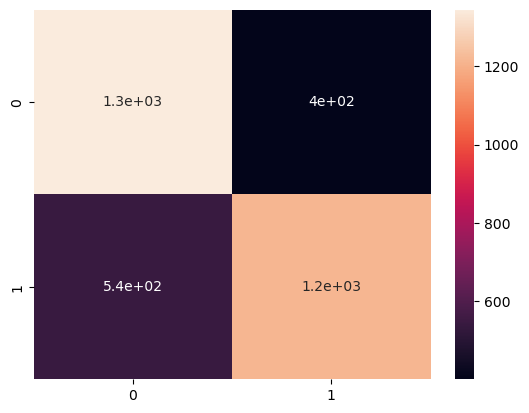

In [147]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_values)
plt.figure()
sns.heatmap(cm,annot = True)

In [148]:
# delete the end point since the predictins are made
xgboost_classifier.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2025-10-16-22-54-32-630
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2025-10-16-22-54-32-630
